In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats



In [12]:
senic_df = pd.read_csv('./senic.csv')
senic_df = senic_df.drop(['id'], axis=1)

senic_df = senic_df[['infection_risk','stay_length', 'age','culture_ratio', 'chest_ratio',
                     'bed_count', 'med_school', 'region', 'avg_daily_census', 'nurse_count',
                     'available_services']]

senic_df.describe().round(2)

,infection_risk,stay_length,age,culture_ratio,chest_ratio,bed_count,med_school,region,avg_daily_census,nurse_count,available_services
count,113.00,113.00,113.00,113.00,113.00,113.00,113.00,113.00,113.00,113.00,113.00
mean,4.35,9.65,53.23,15.79,81.63,252.17,1.85,2.36,191.37,173.25,43.16
std,1.34,1.91,4.46,10.23,19.36,192.84,0.36,1.01,153.76,139.27,15.20
min,1.30,6.70,38.80,1.60,39.60,29.00,1.00,1.00,20.00,14.00,5.70
25%,3.70,8.34,50.90,8.40,69.50,106.00,2.00,2.00,68.00,66.00,31.40
50%,4.40,9.42,53.20,14.10,82.30,186.00,2.00,2.00,143.00,132.00,42.90
75%,5.20,10.47,56.20,20.30,94.10,312.00,2.00,3.00,252.00,218.00,54.30
max,7.80,19.56,65.90,60.50,133.50,835.00,2.00,4.00,791.00,656.00,80.00


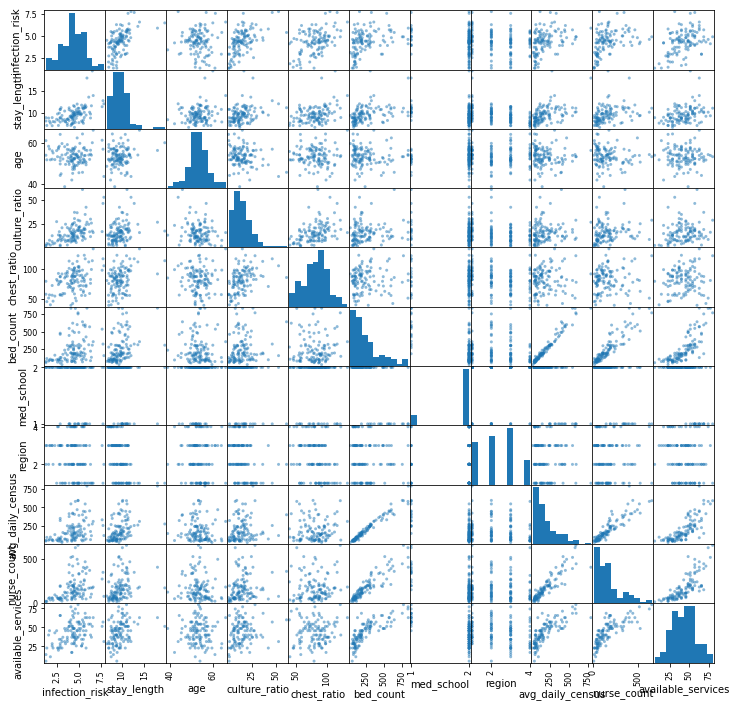

In [25]:
plt.rcParams["figure.figsize"] = (12,12)
pd.plotting.scatter_matrix(senic_df);

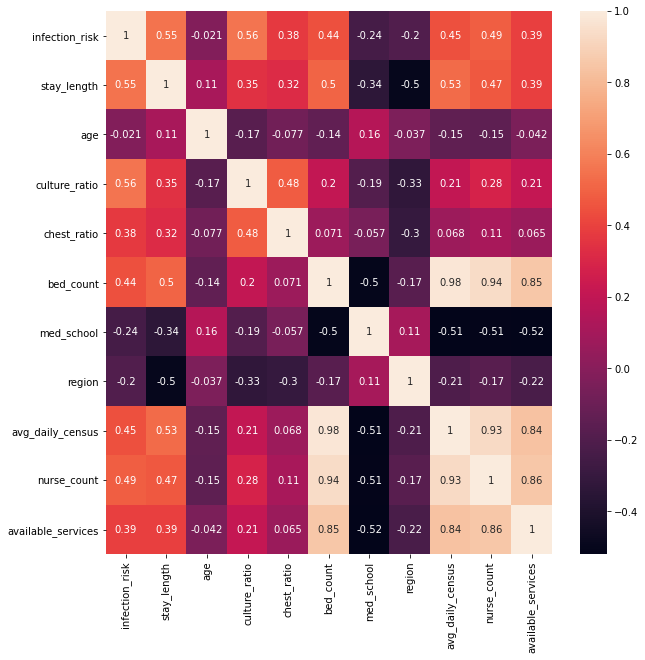

In [26]:
plt.rcParams["figure.figsize"] = (10,10)
corr_mat = senic_df.corr(method='spearman')
sns.heatmap(corr_mat, annot=True)
plt.show()

In [41]:
def qq_plot_maker(df, col):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    prob = stats.probplot(df[col], dist=stats.norm, plot=ax1)
    plt.show()
    
def univariate_plot_maker(df, y_col, x_col, y_col_title, x_col_title):
    df[x_col].plot(kind='hist').set_title(x_col_title);
    qq_plot_maker(df, x_col)
    ax = df.plot(kind='scatter', x=x_col, y=y_col);
    ax.set_title(x_col_title+' vs. ' + y_col_title);

## Infection Risk

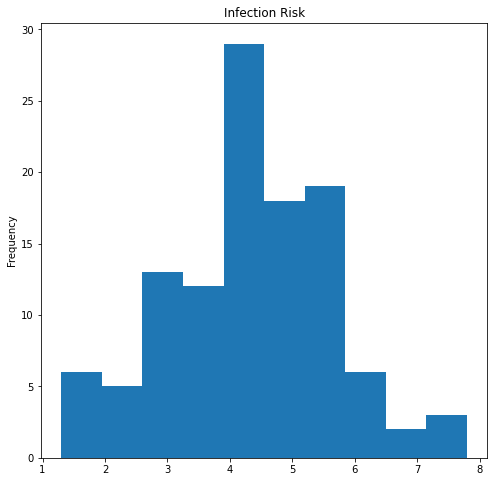

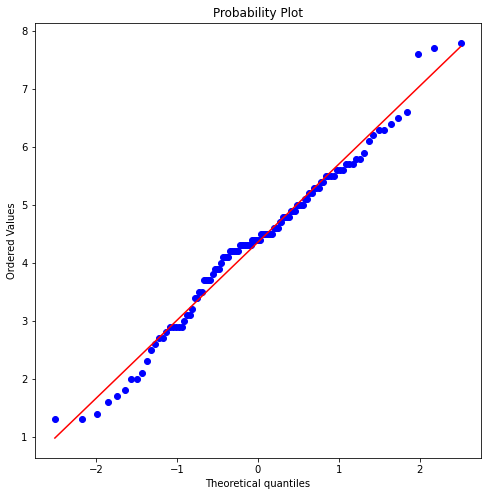

In [42]:
plt.rcParams["figure.figsize"] = (8, 8)

senic_df['infection_risk'].plot(kind='hist').set_title('Infection Risk');
qq_plot_maker(senic_df, 'infection_risk')

## Stay Length

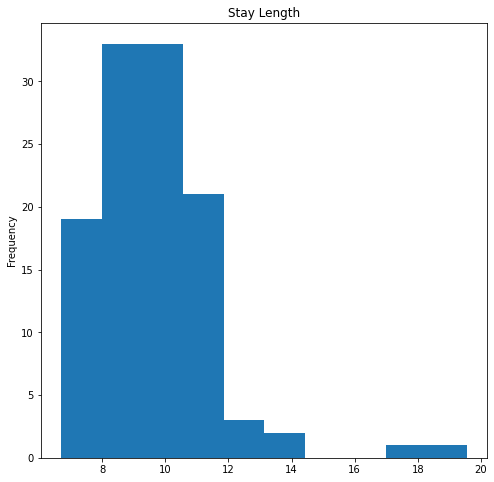

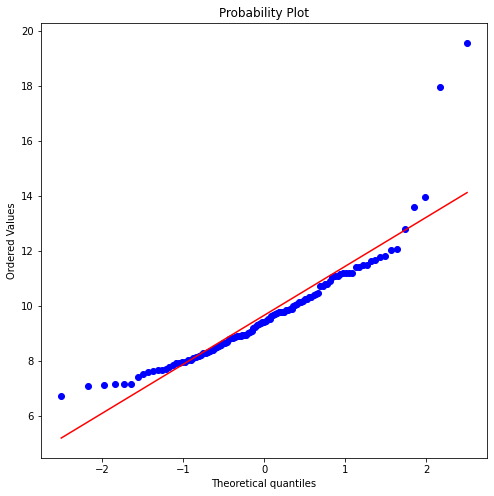

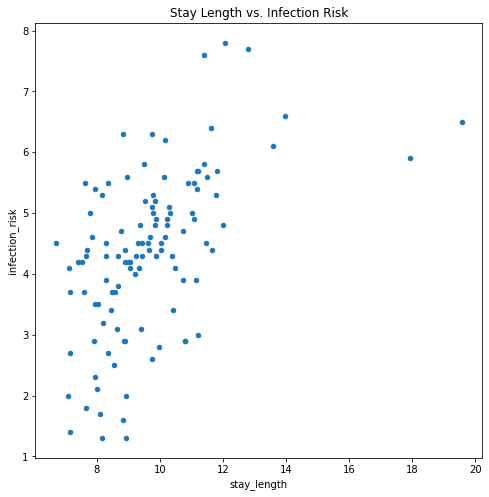

In [43]:
univariate_plot_maker(senic_df, 'infection_risk', 'stay_length', 'Infection Risk', 'Stay Length')

## Age

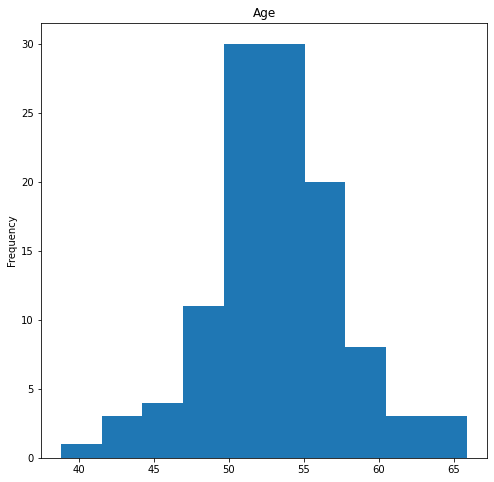

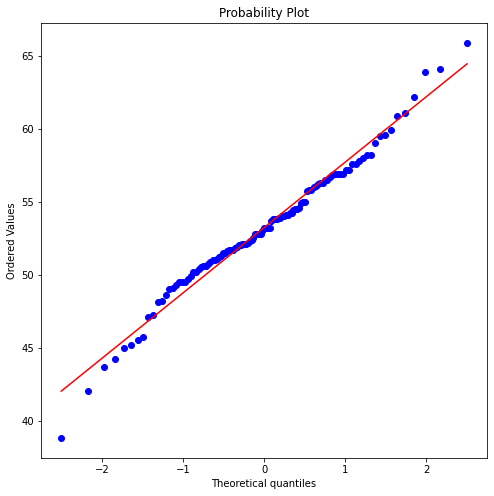

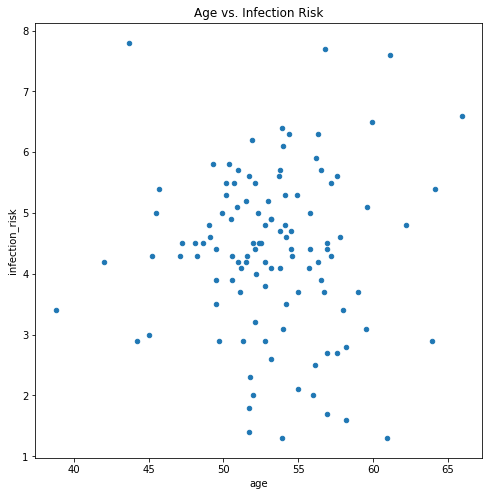

In [44]:
univariate_plot_maker(senic_df, 'infection_risk', 'age', 'Infection Risk', 'Age')

## Culture Ratio

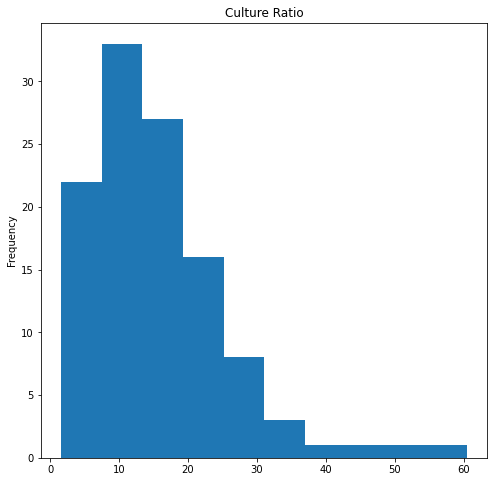

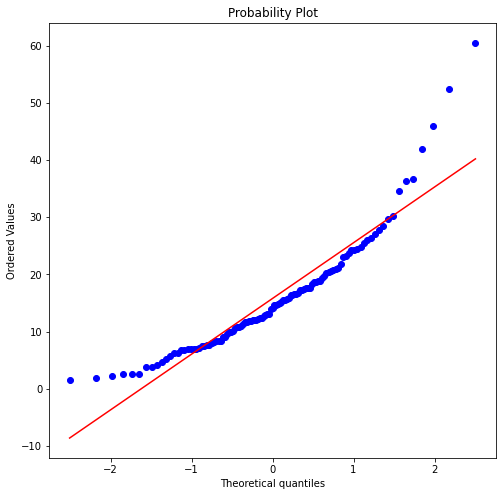

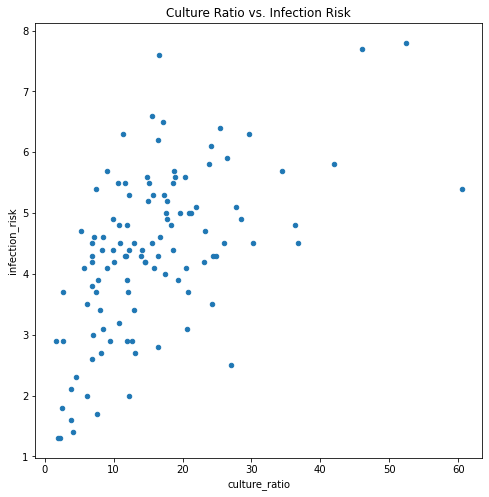

In [45]:
univariate_plot_maker(senic_df, 'infection_risk', 'culture_ratio', 'Infection Risk', 'Culture Ratio')

## Chest Ratio

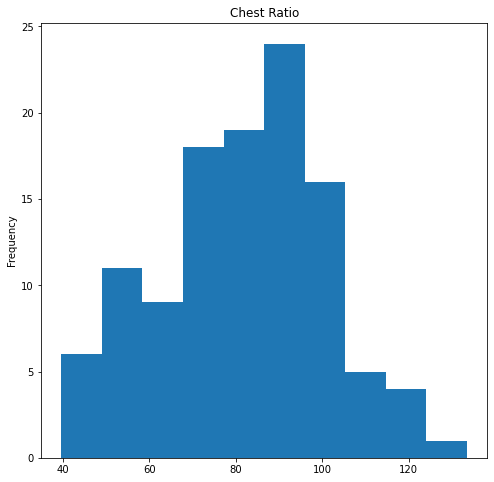

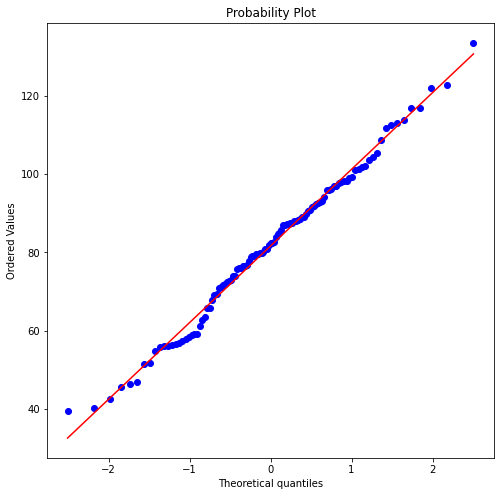

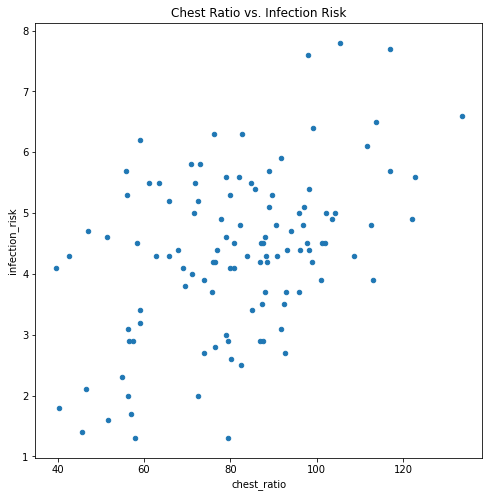

In [46]:
univariate_plot_maker(senic_df, 'infection_risk', 'chest_ratio', 'Infection Risk', 'Chest Ratio')

## Bed Count

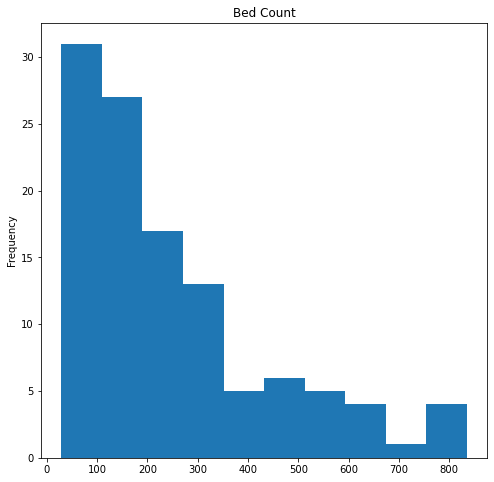

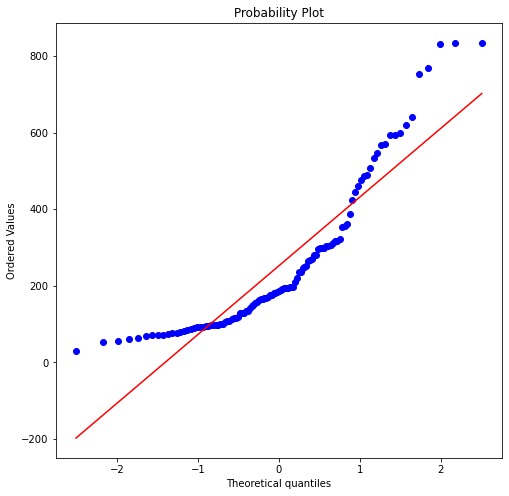

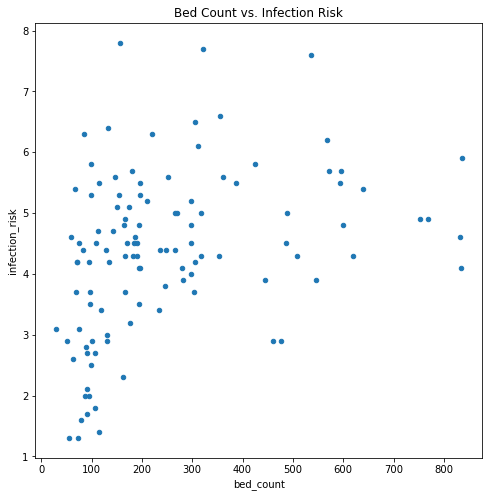

In [49]:
univariate_plot_maker(senic_df, 'infection_risk', 'bed_count', 'Infection Risk', 'Bed Count')

## Med School

2    96
1    17
Name: med_school, dtype: int64

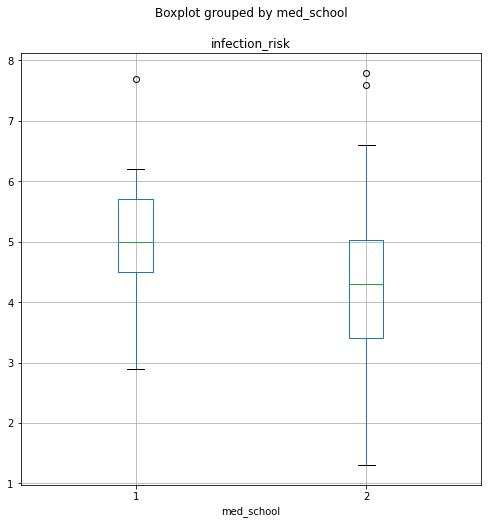

In [52]:
senic_df.boxplot('infection_risk', by='med_school');

senic_df['med_school'].value_counts()

## Region

3    37
2    32
1    28
4    16
Name: region, dtype: int64

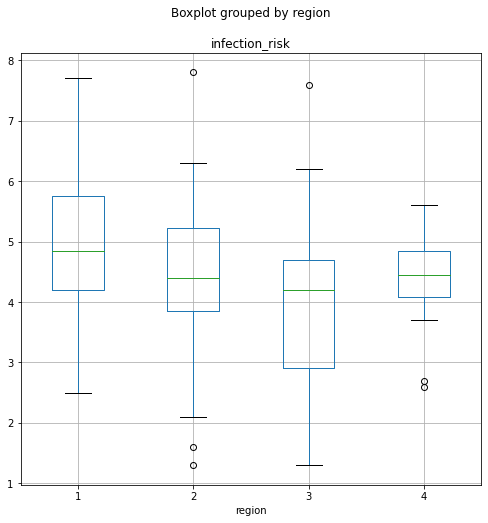

In [53]:
senic_df.boxplot('infection_risk', by='region');

senic_df['region'].value_counts()

## Daily Census

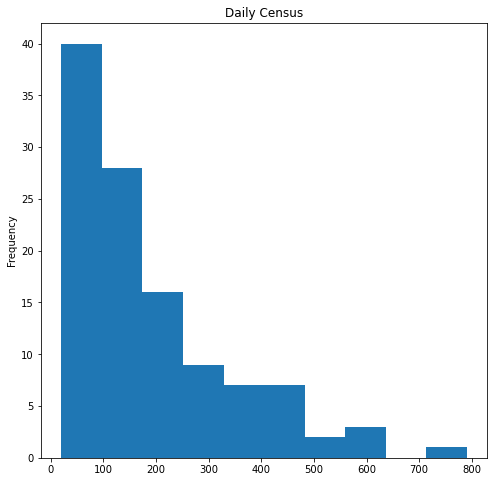

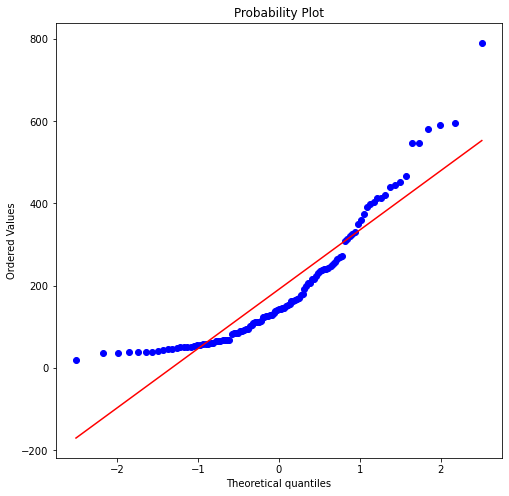

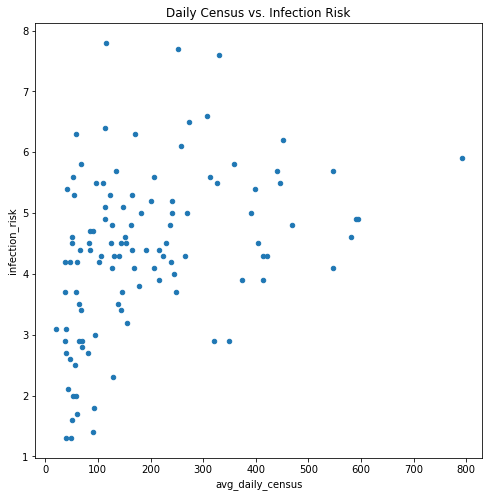

In [55]:
univariate_plot_maker(senic_df, 'infection_risk', 'avg_daily_census', 'Infection Risk', 'Daily Census')

## Nurse Count

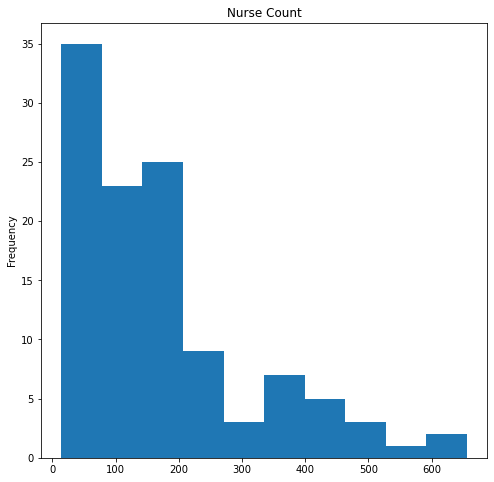

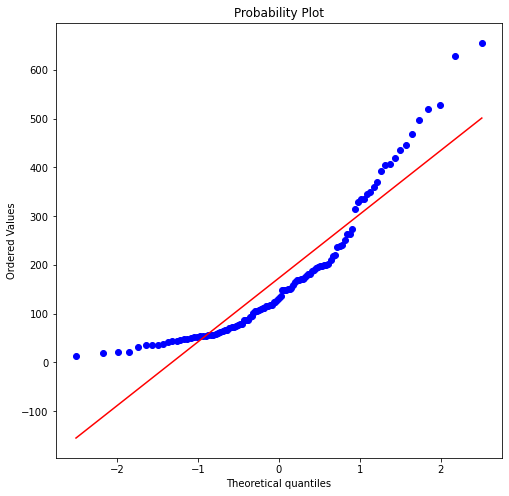

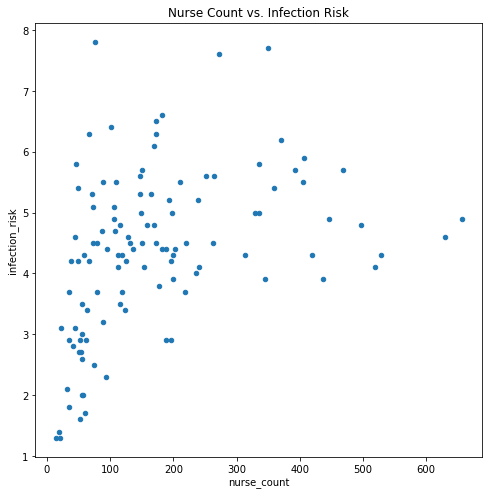

In [56]:
univariate_plot_maker(senic_df, 'infection_risk', 'nurse_count', 'Infection Risk', 'Nurse Count')

## Available Services

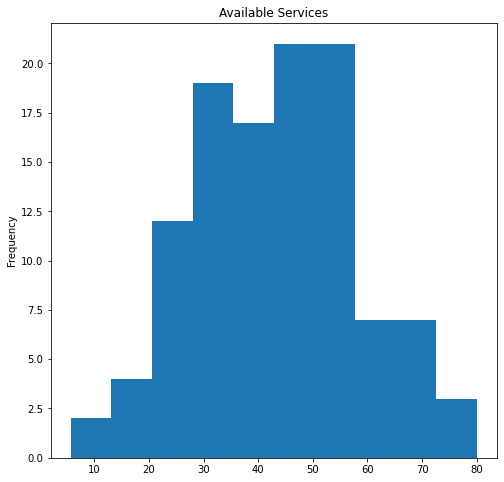

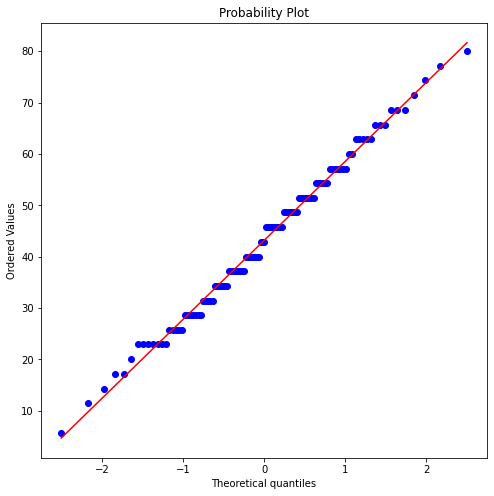

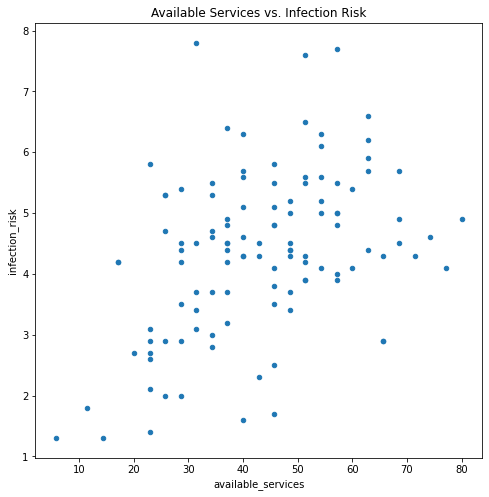

In [57]:
univariate_plot_maker(senic_df, 'infection_risk', 'available_services', 'Infection Risk', 'Available Services')